#### Dataset for the notebook
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction


In [1]:
from google.colab import files
uploaaded=files.upload()

Saving house_price.csv to house_price.csv


In [2]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 43.0 MB/s eta 0:00:00


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import html,dcc,Input,Output,State

%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv('/content/house_price.csv')

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [34]:
df.rename(columns={'long':'longitude'},inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  longit

In [36]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [37]:
numerical_cols=df.select_dtypes(include=np.number).columns
print(numerical_cols)
print(len(numerical_cols))
print("Number of columns in df=",len(df.columns))

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'longitude', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
20
Number of columns in df= 21


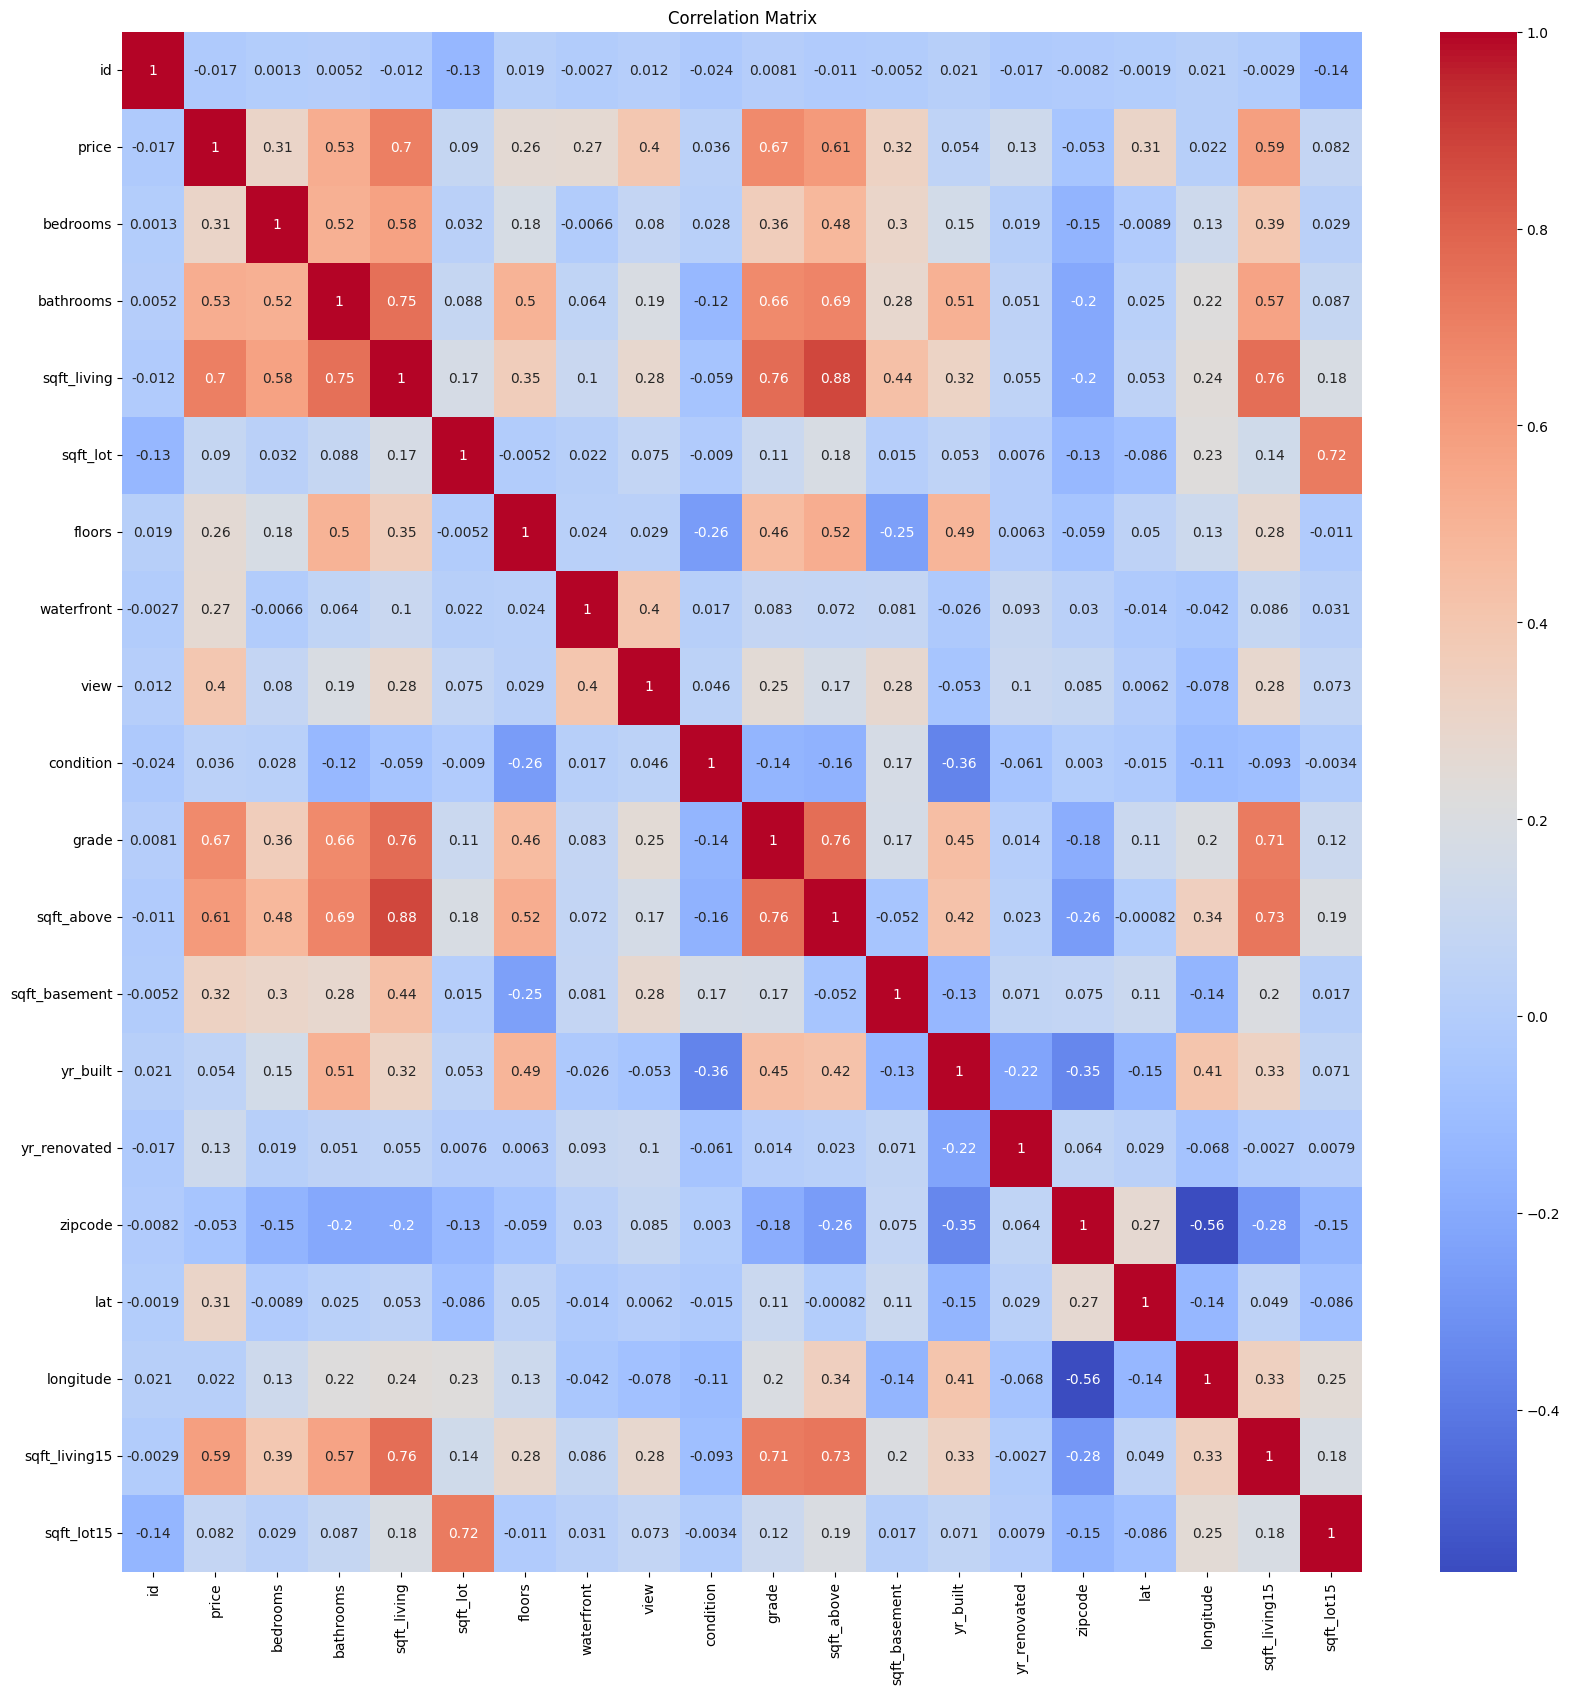

In [38]:
corr_matrix=df[numerical_cols].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
target_corr=corr_matrix['price']
cols_to_drop=target_corr[abs(target_corr<0.25)].index

In [40]:
cols_to_drop

Index(['id', 'sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode',
       'longitude', 'sqft_lot15'],
      dtype='object')

In [41]:
df1=df.drop(columns=['id','zipcode','date','sqft_lot15'],axis=1)

In [42]:
X=df1.drop('price',axis=1)
y=df1['price']

In [43]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,longitude,sqft_living15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410


In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [46]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [47]:
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print('R2 Score:',r2)

R2 Score: 0.852412530052596


In [62]:
#Initiating the Dash app
app=dash.Dash(__name__)

In [63]:
#Layout of the app
app.layout=html.Div([
    html.Div([
        html.H1('House Price Prediction',style={'text-align':'center'}),
        html.Div([
            dcc.Input(id='bedrooms',type='number',placeholder='Number of Bedrooms',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='bathrooms',type='number',placeholder='Number of Bathrooms',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='sqft_living',type='number',placeholder='Squarefeets Of Living',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='sqft_lots',type='number',placeholder='Squarefeets Of Parking Lot',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='floors',type='number',placeholder='Number of Floors',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='waterfront',type='number',placeholder='Waterfront(0=No, 1=Yes)',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='view',type='number',placeholder='View on the scale of 0-4',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='condition',type='number',placeholder='Condition on the scale of 1-5',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='grade',type='number',placeholder='Grade on the scale of 1-13',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='sqft_above',type='number',placeholder='Squarefeet above the Ground',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='sqft_basement',type='number',placeholder='Squarefeet of the Basement',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='yr_built',type='number',placeholder='Year Built',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='yr_renovated',type='number',placeholder='Year Renovated',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='lat',type='number',placeholder='Latitude',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='longitude',type='number',placeholder='Longitude',style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='sqft_lot15',type='number',placeholder='Sqft_Lot15',style={'margin':'10px','padding':'10px'}),
            html.Button('Predict Price',id='predict_button',n_clicks=0,style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ],style={'text-align':'center'}),
        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])


In [64]:
#Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('bedrooms', 'value'),
     State('bathrooms', 'value'),
     State('sqft_living', 'value'),
     State('sqft_lots', 'value'),
     State('floors', 'value'),
     State('waterfront', 'value'),
     State('view', 'value'),
     State('condition', 'value'),
     State('grade', 'value'),
     State('sqft_above', 'value'),
     State('sqft_basement', 'value'),
     State('yr_built', 'value'),
     State('yr_renovated', 'value'),
     State('lat', 'value'),
     State('longitude', 'value'),
     State('sqft_lot15', 'value')]
)

def update_output(n_clicks, bedrooms, bathrooms, sqft_living, sqft_lots, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, lat, longitude, sqft_lot15):
  if n_clicks>0 and all (v is not None for v in [bedrooms, bathrooms, sqft_living, sqft_lots, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, lat, longitude, sqft_lot15]):
    #Prepare the feature vector
    features=pd.DataFrame([[bedrooms,bathrooms,sqft_living, sqft_lots, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, lat, longitude, sqft_lot15]],
                          columns=['bedrooms','bathrooms','sqft_living','sqft_lots','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','longitude','sqft_lot15'])
    #Predict
    prediction=model.predict(features)[0]
    return f'Predicted House Price:{prediction:.2f}'
  elif n_clicks>0:
    return 'Please fill in all the fields'
  return ''

In [65]:
#Run the app
if __name__=='__main__':
  app.run_server(debug=True)

<IPython.core.display.Javascript object>